**A simple model for targeting industrial investments with subsidies and taxes**

by

Dmitry B. Rokhlin and Gennady A. Ougolnitsky 

Code for Section 5.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
A=1.8
mu=0.3
nu=0.5
p=1

$$\ell_1=\left(A \nu^\nu\right)^{1/(1-\nu-\mu)}\left(\frac{\mu}{p}\right)^{\mu/(1-\nu-\mu)} \left(\frac{\mu}{1-\nu}\right)^{\mu/(1-\nu-\mu)},$$
$$\ell_2=(A\nu^\nu)^{1/(1-\nu-\mu)}\left(\frac{\mu}{p}\right)^{\mu/(1-\mu-\nu)}\left(\frac{1-\nu}{\mu}\right)^{\nu/(1-\nu-\mu)}.$$

In [19]:
l_1=(A*nu**nu)**(1/(1-nu-mu))*(mu/p)**(mu/(1-nu-mu))*(mu/(1-nu))**(mu/(1-nu-mu))
l_2=(A*nu**nu)**(1/(1-nu-mu))*(mu/p)**(mu/(1-nu-mu))*((1-nu)/mu)**(nu/(1-nu-mu))
l_1, l_2

(0.2550916800000002, 1.9683000000000017)

$$ g^*=\begin{cases}
(1-\nu)\left(\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/\mu}\displaystyle\frac{p}{\mu}\underline x^{(1-\nu)/\mu}-\underline x\right) ,& \underline x\le\ell_1,\\
\varkappa(\mu,\nu)\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/(\mu+\nu)}\left(\displaystyle\frac{p}{\mu}\right)^{\mu/(\mu+\nu)}\underline x^{1/(\mu+\nu)}-\underline x, & \ell_1\le \underline x\le\ell_2,\\
\nu\left(\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/\nu} \left(\displaystyle\frac{p}{\mu}\right)^{\mu/\nu}\underline x^{(1-\mu)/\nu}-\underline x \right), &\ell_2\le \underline x,
\end{cases} $$

$$\varkappa(\mu,\nu)=\nu\left(\frac{1-\nu}{\mu}\right)^{\mu/(\mu+\nu)}+(1-\nu)\left(\frac{\mu}{1-\nu}\right)^{\nu/(\mu+\nu)}. $$

In [20]:
kappa=nu*((1-nu)/mu)**(mu/(mu+nu))+(1-nu)*(mu/(1-nu))**(nu/(nu+mu))
kappa

0.9689096204391923

In [21]:
def g_star(x):
    if x<=l_1:
        v=(1-nu)*((1/(A*nu**nu))**(1/mu)*p/mu*x**((1-nu)/mu)-x)
    elif l_1<x<=l_2:
        v=kappa*(1/(A*nu**nu))**(1/(mu+nu))*(p/mu)**(mu/(mu+nu))*x**(1/(mu+nu))-x
    elif l_2<x:
        v=nu*((1/(A*nu**nu))**(1/nu)*(p/mu)**(mu/nu)*x**((1-mu)/nu)-x)
    return v

$$ f^* =\begin{cases}
   (1-\mu-\nu)\displaystyle\left(\frac{1}{A\nu^\nu}\right)^{1/\mu}\frac{p}{\mu}\underline x^{(1-\nu)/\mu} , & \underline x\le\ell_1,\\
    (1-\mu-\nu)\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/(\mu+\nu)}\left(\displaystyle\frac{p}{\mu}\right)^{\mu/(\mu+\nu)} \left(\displaystyle\frac{\mu}{1-\nu}\right)^{\nu/(\mu+\nu)}\underline x^{1/(\mu+\nu)}, & \ell_1\le\underline x\le\ell_2,\\
    (1-\mu-\nu)\underline x, & \ell_2\le\underline x.
  \end{cases}  $$

In [22]:
def f_star(x):
    if x<=l_1:
        v=(1-mu-nu)*(1/(A*nu**nu))**(1/mu)*p/mu*x**((1-nu)/mu)
    elif l_1<x<=l_2:
        v=(1-mu-nu)*(1/(A*nu**nu))**(1/(mu+nu))*(p/mu)**(mu/(mu+nu))*(mu/(1-nu))**(nu/(mu+nu))*x**(1/(mu+nu))
    elif l_2<x:
        v=(1-mu-nu)*x
    return v    

$$\sigma^*=\begin{cases}
1-\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/\mu}\displaystyle\frac{p}{\mu}\underline x^{(1-\nu-\mu)/\mu}, & \underline x\le\ell_1,\\
1-\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/(\mu+\nu)}\left(\displaystyle\frac{p}{\mu}\right)^{\mu/(\mu+\nu)}\left(\displaystyle\frac{\mu}{1-\nu}\right)^{\nu/(\mu+\nu)}\underline x^{(1-\mu-\nu)/(\mu+\nu)}, & \ell_1\le \underline x\le\ell_2,\\
0, & \ell_2\le \underline x,
\end{cases}$$

In [23]:
def sigma_star(x):
    if x<=l_1:
        v=1-(1/(A*nu**nu))**(1/mu)*p/mu*x**((1-nu-mu)/mu)
    elif l_1<x<=l_2:
        v=1-(1/(A*nu**nu))**(1/(mu+nu))*(p/mu)**(mu/(mu+nu))*(mu/(1-nu))**(nu/(mu+nu))*x**((1-mu-nu)/(mu+nu))
    elif l_2<x:
        v=0
    return v    

$$ \delta^*=\begin{cases}
0, & \underline x\le\ell_1,\\
\displaystyle\frac{1-\nu}{\mu}-1, & \ell_1<\underline x\le\ell_2,\\
\left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/\nu}
\left(\displaystyle\frac{p}{\mu}\right)^{\mu/\nu}\underline x^{(1-\mu-\nu)/\nu}-1,  & \ell_2\le \underline x,
\end{cases}
$$

In [24]:
def delta_star(x):
    if x<=l_1:
        v=0
    elif l_1<x<=l_2:
        v=(1-nu)/mu-1
    elif l_2<x:
        v=(1/(A*nu**nu))**(1/nu)*(p/mu)**(mu/nu)*x**((1-mu-nu)/nu)-1
    return v    

$$ \beta^*=\begin{cases}
    1-\nu, & \underline x\le \ell_1\\
    1, & \underline x>\ell_1,
\end{cases} $$
$$ \gamma^*=\begin{cases}
    0, & \underline x\le\ell_1\\
    \displaystyle\frac{\nu}{1-\nu}, & \underline x>\ell_1,
\end{cases} $$

In [25]:
def beta_star(x):
    if x<=l_1:
        return 1-nu
    else:
        return 1
    
def gamma_star(x):
    if x<=l_1:
        return 0
    else:
        return nu/(1-nu)    

$$ L^* =\begin{cases}
    \left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/\mu}\underline x^{(1-\nu)/\mu}, & \underline x\le\ell_1,\\
    \left(\displaystyle\frac{1}{A\nu^\nu}\right)^{1/(\mu+\nu)}\left(\displaystyle\frac{\mu}{p}\right)^{\nu/(\mu+\nu)} \left(\displaystyle\frac{\mu}{1-\nu}\right)^{\nu/(\mu+\nu)}\underline x^{1/(\mu+\nu)}, & \ell_1\le\underline x\le\ell_2,\\
    \displaystyle\frac{\mu}{p}\underline x, & \ell_2\le\underline x.
\end{cases}$$

In [26]:
def L_star(x):
    if x<=l_1:
        v=(1/(A*nu**nu))**(1/mu)*x**((1-nu)/mu)
    elif l_1<x<=l_2:
        v=(1/(A*nu**nu))**(1/(mu+nu))*(mu/p)**(nu/(nu+mu))*(mu/(1-nu))**(nu/(mu+nu))*x**(1/(mu+nu))
    elif l_2<x:
        v=mu/p*x
    return v    

In [27]:
cost=[]
revenue=[]
sigma=[]
delta=[]
beta=[]
gamma=[]
L=[]
x_=[]
N=1000
for x in np.linspace(0,1.3*l_2,N):
    x_.append(x)
    cost.append(g_star(x))
    revenue.append(f_star(x))
    sigma.append(sigma_star(x))
    if np.abs(x-l_1)<2e-3:
        delta.append(np.nan)
    else:
        delta.append(delta_star(x)) 
    beta.append(beta_star(x))
    gamma.append(gamma_star(x))
    L.append(L_star(x))

In [28]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
plt.rc('text', usetex=True)

#### Fair production level:

$$ \underline x^\circ=\left(\frac{1}{\varkappa}\right)^{(\mu+\nu)/(1-\mu-\nu)}(A\nu^\nu)^{1/(1-\mu-\nu)}\left(\frac{\mu}{p}\right)^{\mu/(1-\mu-\nu)}.
$$

In [29]:
x_circ=(1/kappa)**((mu+nu)/(1-mu-nu))*(mu/p)**(mu/(1-mu-nu))*(A*nu**nu)**(1/(1-mu-nu))
x_circ

0.6227824218750002

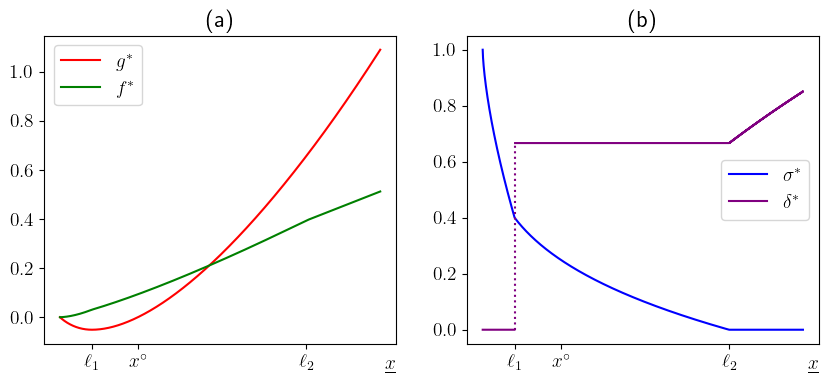

In [30]:
ell=[l_1,x_circ,l_2]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].plot(x_,cost,c='r',label=r'$g^*$');
axes[0].plot(x_,revenue,c='g',label=r'$f^*$');
axes[0].set_xticks(ell)
axes[0].set_xticklabels(['$\ell_1$',str(r'$x^\circ$'),'$\ell_2$'])
axes[0].set_xlabel(r'$\underline{x}$',loc='right',labelpad=-10)
axes[0].set_title('(a)')
axes[0].legend()
axes[1].plot(x_,sigma,c='b',label=r'$\sigma^*$');
axes[1].plot(x_,delta,c='purple',label=r'$\delta^*$',drawstyle='steps-post');
axes[1].set_xticks(ell)
axes[1].set_xticklabels(['$\ell_1$',str(r'$x^\circ$'),'$\ell_2$'])
axes[1].set_xlabel(r'$\underline{x}$',loc='right',labelpad=-10)
axes[1].vlines(l_1,0,(1-nu)/mu-1,ls=':',colors='purple')
axes[1].set_title('(b)')
axes[1].legend();

In [31]:
fig.savefig("Fig_1.pdf", dpi=400)